Missing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_missing.csv')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [3]:
# df.style.format({'Temp': '{}', 'Humid': '{:.4f}'})

check missing values

In [4]:
df.isnull().sum()

Date     0
Zone     1
Temp     3
Humid    1
Rain     2
dtype: int64

In [5]:
df.Temp.isnull().sum()

3

In [6]:
df[df.Temp.isnull()]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
7,8,Y,NaN,40.0,NaN


check statistic data

In [7]:
df.shape

(10, 5)

In [8]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [9]:
df.Date = df.Date.astype('category')

In [10]:
df.describe()

,Temp,Humid
count,7.000000,9.000000
mean,16.142857,36.766667
std,3.184785,7.343705
min,12.000000,25.700000
25%,14.000000,30.200000
50%,15.000000,35.000000
75%,19.000000,45.000000
max,20.000000,45.000000


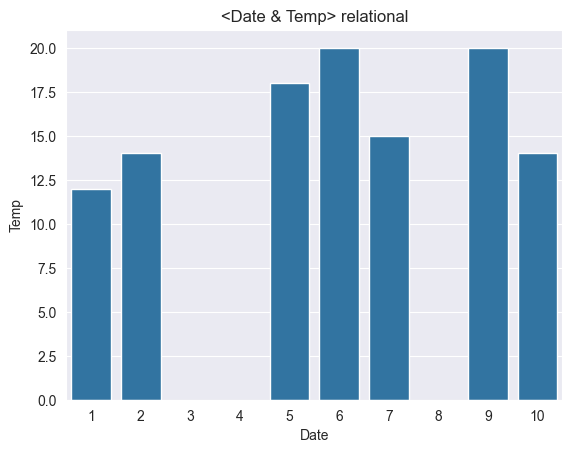

In [11]:
sns.set_style('darkgrid')
sns.barplot(data=df, x='Date', y='Temp')
plt.title('<Date & Temp> relational')
plt.show()

จัดการกับ Missing Values

In [12]:
# แทนที่ด้วยค่ากลาง => ค่าเฉลี่ยเลขคณิต
df.Humid = df.Humid.fillna(df['Humid'].mean())
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000
1,2,S,14.0,35.000000,--
2,3,E,NaN,30.200000,NaN
3,4,W,NaN,35.000000,700.5
4,5,N,18.0,25.700000,1600
5,6,N,20.0,36.766667,800.8
6,7,NaN,15.0,45.000000,950
7,8,Y,NaN,40.000000,NaN
8,9,Y,20.0,30.000000,1800
9,10,none,14.0,45.000000,90.5


In [13]:
# แทนที่ด้วยค่าที่กำหนดเอง => กำหนดให้ = 99
# df.Humid = df.Humid.fillna(99)

In [14]:
# เปลี่ยนชนิดข้อมูลภายใน dataset
df.Rain = pd.to_numeric(df.Rain, errors='coerce')
df.dtypes

Date     category
Zone       object
Temp      float64
Humid     float64
Rain      float64
dtype: object

In [15]:
# ต่อจากข้างบน เมื่อเปลี่ยน data type เป็น float แล้วก็จะสามารถเติมตัวเลขไปได้
df.Rain = df.Rain.fillna(df['Rain'].mean())
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000.000000
1,2,S,14.0,35.000000,991.685714
2,3,E,NaN,30.200000,991.685714
3,4,W,NaN,35.000000,700.500000
4,5,N,18.0,25.700000,1600.000000
5,6,N,20.0,36.766667,800.800000
6,7,NaN,15.0,45.000000,950.000000
7,8,Y,NaN,40.000000,991.685714
8,9,Y,20.0,30.000000,1800.000000
9,10,none,14.0,45.000000,90.500000


In [16]:
# แทนค่า NaN ด้วยค่าถัดไป
df.Temp.fillna(method='bfill')

0    12.0
1    14.0
2    18.0
3    18.0
4    18.0
5    20.0
6    15.0
7    20.0
8    20.0
9    14.0
Name: Temp, dtype: float64

In [17]:
# แทนท่า NaN ด้วยค่าก่อนหน้า
df.Temp.fillna(method='pad', inplace=True)
# df.Temp.fillna(method='pad', limit=1, inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000.000000
1,2,S,14.0,35.000000,991.685714
2,3,E,14.0,30.200000,991.685714
3,4,W,14.0,35.000000,700.500000
4,5,N,18.0,25.700000,1600.000000
5,6,N,20.0,36.766667,800.800000
6,7,NaN,15.0,45.000000,950.000000
7,8,Y,15.0,40.000000,991.685714
8,9,Y,20.0,30.000000,1800.000000
9,10,none,14.0,45.000000,90.500000


In [18]:
# ลบทั้งแถวที่มี missing value
df.dropna(inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000.000000
1,2,S,14.0,35.000000,991.685714
2,3,E,14.0,30.200000,991.685714
3,4,W,14.0,35.000000,700.500000
4,5,N,18.0,25.700000,1600.000000
5,6,N,20.0,36.766667,800.800000
7,8,Y,15.0,40.000000,991.685714
8,9,Y,20.0,30.000000,1800.000000
9,10,none,14.0,45.000000,90.500000


In [19]:
# ลบโดยเลือกสนใจเฉพาะบางจุด => เจาะจงแค่ Temp , Humid
# จะลบก็ต่อเมื่อ Temp , Humid = NaN
df.dropna(subset=['Temp','Humid'], inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000.000000
1,2,S,14.0,35.000000,991.685714
2,3,E,14.0,30.200000,991.685714
3,4,W,14.0,35.000000,700.500000
4,5,N,18.0,25.700000,1600.000000
5,6,N,20.0,36.766667,800.800000
7,8,Y,15.0,40.000000,991.685714
8,9,Y,20.0,30.000000,1800.000000
9,10,none,14.0,45.000000,90.500000


In [20]:
# ลบ column
# df.dropna(axis='column', inplace=True)

In [21]:
# ขออนุญาต import data ที่ยังไม่แก้มาใหม่อีกอัน
df2 = pd.read_csv('data/data_missing.csv')
df2

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [22]:
# ลบแบบมีเงื่อนไข => ลบแล้วต้องเหลือ >= 8 ตัวจากเดิม 10
df2.dropna(thresh=8, axis=1)

,Date,Zone,Humid,Rain
0,1,N,45.0,1000
1,2,S,35.0,--
2,3,E,30.2,NaN
3,4,W,35.0,700.5
4,5,N,25.7,1600
5,6,N,NaN,800.8
6,7,NaN,45.0,950
7,8,Y,40.0,NaN
8,9,Y,30.0,1800
9,10,none,45.0,90.5


In [23]:
# เตรียมข้อมูลสำหรับ NaN ทั้งแถว
df2.loc[[0,],:] = np.nan
df2

,Date,Zone,Temp,Humid,Rain
0,NaN,NaN,NaN,NaN,NaN
1,2.0,S,14.0,35.0,--
2,3.0,E,NaN,30.2,NaN
3,4.0,W,NaN,35.0,700.5
4,5.0,N,18.0,25.7,1600
5,6.0,N,20.0,NaN,800.8
6,7.0,NaN,15.0,45.0,950
7,8.0,Y,NaN,40.0,NaN
8,9.0,Y,20.0,30.0,1800
9,10.0,none,14.0,45.0,90.5


In [24]:
# ลบแบบมีเงื่อนไข => หาแถวที่ NaN ทั้งแถว
df2[df2.isnull().all(axis=1)]

,Date,Zone,Temp,Humid,Rain
0,NaN,NaN,NaN,NaN,NaN


In [27]:
# ลบแถวที่ NaN ทั้งแถว
df2.dropna(how='all', inplace=True)
df2

,Date,Zone,Temp,Humid,Rain
1,2.0,S,14.0,35.0,--
2,3.0,E,NaN,30.2,NaN
3,4.0,W,NaN,35.0,700.5
4,5.0,N,18.0,25.7,1600
5,6.0,N,20.0,NaN,800.8
6,7.0,NaN,15.0,45.0,950
7,8.0,Y,NaN,40.0,NaN
8,9.0,Y,20.0,30.0,1800
9,10.0,none,14.0,45.0,90.5


In [28]:
# เพิ่ม col มาเพื่อข้างล่าง
df2['location'] = np.nan
df2

,Date,Zone,Temp,Humid,Rain,location
1,2.0,S,14.0,35.0,--,NaN
2,3.0,E,NaN,30.2,NaN,NaN
3,4.0,W,NaN,35.0,700.5,NaN
4,5.0,N,18.0,25.7,1600,NaN
5,6.0,N,20.0,NaN,800.8,NaN
6,7.0,NaN,15.0,45.0,950,NaN
7,8.0,Y,NaN,40.0,NaN,NaN
8,9.0,Y,20.0,30.0,1800,NaN
9,10.0,none,14.0,45.0,90.5,NaN


In [31]:
# drop col if all are NaN
df2.dropna(axis=1, how='all', inplace=True)
df2

,Date,Zone,Temp,Humid,Rain
1,2.0,S,14.0,35.0,--
2,3.0,E,NaN,30.2,NaN
3,4.0,W,NaN,35.0,700.5
4,5.0,N,18.0,25.7,1600
5,6.0,N,20.0,NaN,800.8
6,7.0,NaN,15.0,45.0,950
7,8.0,Y,NaN,40.0,NaN
8,9.0,Y,20.0,30.0,1800
9,10.0,none,14.0,45.0,90.5
